# House Prices: Advanced Regression Techniques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Training Data

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_train.describe().transpose()

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

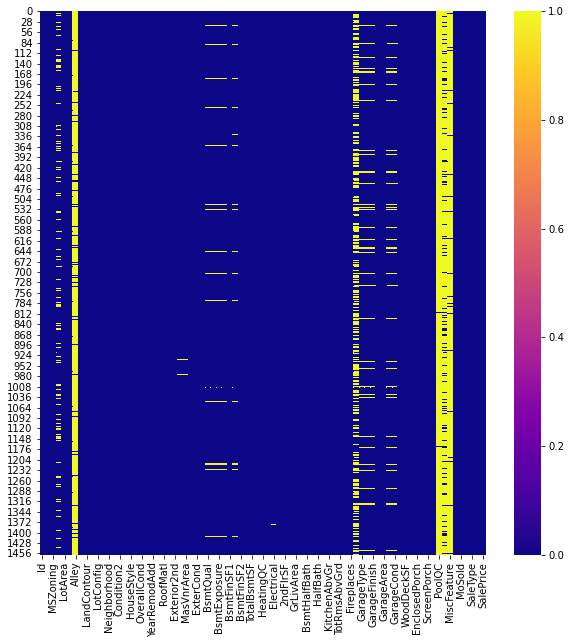

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.isnull(),cmap='plasma')

## Data Cleaning

In [8]:
df_train.select_dtypes(include='object').isnull().sum()[df_train.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    df_train[col]=df_train[col].fillna('None')

In [10]:
df_train[col]=df_train[col].fillna('None')
def getHighCategoricalValueCounts():
    column = []
    categorical_columns = df_train.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(df_train[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()

# Remove the columns with skewed data

df_train.drop(columnsToBeRemoved, axis = 1, inplace = True)

df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  ...  EnclosedPorch  3SsnPorch  \
0      CollgCr     1Fam     2Story  ...              0          0   
1      Veenker     1Fam     1Story  ...              0          0   
2      CollgCr     1Fam     2Story  ...              0          0   
3      Crawfor     1Fam     2Story  ...            272          0   
4      NoRidge     1Fam     2Story  ...              0          0   

   ScreenPorch  PoolArea Fence MiscVal MoSold YrSold  SaleCondition SalePrice  
0            0         0  None       0      2   2008         Normal    208500  
1            0         0  None       0      5   2007         Normal    181500  
2            0         0  None       0      9   2008         Normal    223500  
3            0         0  None       0      2   2006        Abnorml    140000  
4            0         0  None       0     12   2008         Normal    250000  

[5 rows x 60 columns]

In [11]:
df_train.select_dtypes(include='object').isnull().sum()[df_train.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

In [12]:
df_train.select_dtypes(include=['int64','float']).isnull().sum()[df_train.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [13]:
df_train['LotFrontage'] = df_train['LotFrontage'].replace(np.nan, df_train['LotFrontage'].median())
df_train['MasVnrArea'] = df_train['MasVnrArea'].replace(np.nan, df_train['MasVnrArea'].median())
df_train['GarageYrBlt']= df_train['GarageYrBlt'].fillna(0)
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].astype(int)

In [14]:
def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
df_train['IsRemodelled'] = df_train.apply(checkForRemodel, axis=1)
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  ...  3SsnPorch  ScreenPorch  PoolArea  \
0      CollgCr     1Fam     2Story  ...          0            0         0   
1      Veenker     1Fam     1Story  ...          0            0         0   
2      CollgCr     1Fam     2Story  ...          0            0         0   
3      Crawfor     1Fam     2Story  ...          0            0         0   
4      NoRidge     1Fam     2Story  ...          0            0         0   

   Fence MiscVal MoSold YrSold SaleCondition  SalePrice IsRemodelled  
0   None       0      2   2008        Normal     208500            0  
1   None       0      5   2007        Normal     181500            0  
2   None       0      9   2008        Normal     223500            1  
3   None       0      2   2006       Abnorml     140000            1  
4   None       0     12   2008        Normal     250000            0  

[5 rows x 61 columns]

In [15]:
def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
df_train['BuiltOrRemodelAge'] = df_train.apply(getBuiltOrRemodelAge, axis=1)
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  ...  ScreenPorch  PoolArea  Fence  \
0      CollgCr     1Fam     2Story  ...            0         0   None   
1      Veenker     1Fam     1Story  ...            0         0   None   
2      CollgCr     1Fam     2Story  ...            0         0   None   
3      Crawfor     1Fam     2Story  ...            0         0   None   
4      NoRidge     1Fam     2Story  ...            0         0   None   

   MiscVal MoSold YrSold SaleCondition SalePrice  IsRemodelled  \
0        0      2   2008        Normal    208500             0   
1        0      5   2007        Normal    181500             0   
2        0      9   2008        Normal    223500             1   
3        0      2   2006       Abnorml    140000             1   
4        0     12   2008        Normal    250000             0   

  BuiltOrRemodelAge  
0                 5  
1                31  
2                 6  
3                36  
4                 8  

[5 rows x 62 columns]

In [16]:
def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
df_train['OldOrNewGarage'] = df_train['GarageYrBlt'].apply(getGarageConstructionPeriod)
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  ...  PoolArea  Fence  MiscVal  MoSold  \
0      CollgCr     1Fam     2Story  ...         0   None        0       2   
1      Veenker     1Fam     1Story  ...         0   None        0       5   
2      CollgCr     1Fam     2Story  ...         0   None        0       9   
3      Crawfor     1Fam     2Story  ...         0   None        0       2   
4      NoRidge     1Fam     2Story  ...         0   None        0      12   

  YrSold SaleCondition SalePrice IsRemodelled  BuiltOrRemodelAge  \
0   2008        Normal    208500            0                  5   
1   2007        Normal    181500            0                 31   
2   2008        Normal    223500            1                  6   
3   2006       Abnorml    140000            1                 36   
4   2008        Normal    250000            0                  8   

  OldOrNewGarage  
0              1  
1              0  
2              1  
3              0  
4              1  

[5 rows x 63 columns]

In [17]:
df_train.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [18]:
def getHighNumericalValueCounts():
    column = []
    numerical_columns = df_train.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(df_train[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
df_train.drop(columnsToBeRemoved, axis = 1, inplace = True)

df_train.drop(['MoSold'], axis = 1, inplace = True)

df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  ...  GarageCars  GarageArea WoodDeckSF  \
0      CollgCr     1Fam     2Story  ...           2         548          0   
1      Veenker     1Fam     1Story  ...           2         460        298   
2      CollgCr     1Fam     2Story  ...           2         608          0   
3      Crawfor     1Fam     2Story  ...           3         642          0   
4      NoRidge     1Fam     2Story  ...           3         836        192   

  OpenPorchSF Fence SaleCondition  SalePrice IsRemodelled BuiltOrRemodelAge  \
0          61  None        Normal     208500            0                 5   
1           0  None        Normal     181500            0                31   
2          42  None        Normal     223500            1                 6   
3          35  None       Abnorml     140000            1                36   
4          84  None        Normal     250000            0                 8   

  OldOrNewGarage  
0              1  
1              0  
2              1  
3              0  
4              1  

[5 rows x 49 columns]

In [19]:

percent_missing = round(100*(df_train.isnull().sum()/len(df_train.index)), 2)
print(percent_missing)

Id                   0.0
MSSubClass           0.0
MSZoning             0.0
LotFrontage          0.0
LotArea              0.0
LotShape             0.0
LotConfig            0.0
Neighborhood         0.0
BldgType             0.0
HouseStyle           0.0
OverallQual          0.0
OverallCond          0.0
RoofStyle            0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrType           0.0
MasVnrArea           0.0
ExterQual            0.0
Foundation           0.0
BsmtQual             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
HeatingQC            0.0
1stFlrSF             0.0
2ndFlrSF             0.0
GrLivArea            0.0
BsmtFullBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenQual          0.0
TotRmsAbvGrd         0.0
Fireplaces           0.0
FireplaceQu          0.0
GarageType           0.0
GarageFinish         0.0
GarageCars           0.0


In [20]:
df_train[df_train.duplicated(keep=False)]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, LotShape, LotConfig, Neighborhood, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, Foundation, BsmtQual, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, FireplaceQu, GarageType, GarageFinish, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, Fence, SaleCondition, SalePrice, IsRemodelled, BuiltOrRemodelAge, OldOrNewGarage]
Index: []

[0 rows x 49 columns]

In [21]:
df_train.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    69.863699   10516.828082     6.099315   
std     421.610009    42.300571    22.027677    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    92.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   104.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   137.410000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond   MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean      5.575342   103.117123   443.639726   567.240411  1057.429452  ...   
std       1.112799   180.731373   456.098091   441.866955   438.705324  ...   
min       1.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       5.000000     0.000000     0.000000   223.000000   795.750000  ...   
50%       5.000000     0.000000   383.500000   477.500000   991.500000  ...   
75%       6.000000   164.250000   712.250000   808.000000  1298.250000  ...   
90%       7.000000   335.000000  1065.500000  1232.000000  1602.200000  ...   
95%       8.000000   456.000000  1274.000000  1468.000000  1753.000000  ...   
99%       9.000000   791.280000  1572.410000  1797.050000  2155.050000  ...   
max       9.000000  1600.000000  5644.000000  2336.000000  6110.000000  ...   

       TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean       6.517808     0.613014     1.767123   472.980137    94.244521   
std        1.625393     0.644666     0.747315   213.804841   125.338794   
min        2.000000     0.000000     0.000000     0.000000     0.000000   
25%        5.000000     0.000000     1.000000   334.500000     0.000000   
50%        6.000000     1.000000     2.000000   480.000000     0.000000   
75%        7.000000     1.000000     2.000000   576.000000   168.000000   
90%        9.000000     1.000000     3.000000   757.100000   262.000000   
95%       10.000000     2.000000     3.000000   850.100000   335.000000   
99%       11.000000     2.000000     3.000000  1002.790000   505.460000   
max       14.000000     3.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF      SalePrice  IsRemodelled  BuiltOrRemodelAge  \
count  1460.000000    1460.000000   1460.000000        1460.000000   
mean     46.660274  180921.195890      0.476712          22.950000   
std      66.256028   79442.502883      0.499629          20.640653   
min       0.000000   34900.000000      0.000000          -1.000000   
25%       0.000000  129975.000000      0.000000           4.000000   
50%      25.000000  163000.000000      0.000000          14.000000   
75%      68.000000  214000.000000      1.000000          41.000000   
90%     130.000000  278000.000000      1.000000          56.000000   
95%     175.050000  326100.000000      1.000000          58.000000   
99%     285.820000  442567.010000      1.000000          60.000000   
max     547.000000  755000.000000      1.000000          60.000000   

       OldOrNewGarage  
count     1460.000000  
mean         0.275342  
std          0.446840  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          1.000000  
90%          1.000000  
95%          1.000000  
99%          1.000000  
max          1.000000  

[11 rows x 27 columns]

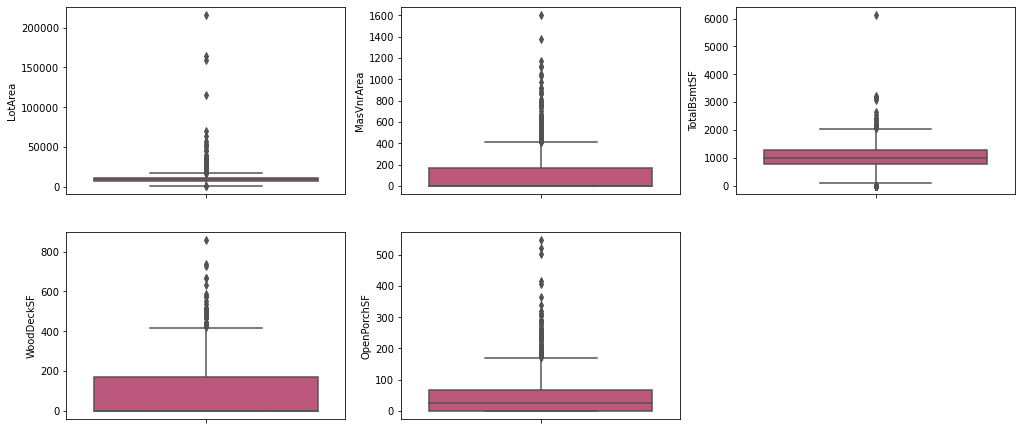

In [22]:
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='plasma', data = df_train)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='plasma', data = df_train)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='plasma', data = df_train)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='plasma', data = df_train)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='plasma', data = df_train)
plt.show()

In [23]:
nn_quartile_LotArea = df_train['LotArea'].quantile(0.98)
df_train = df_train[df_train["LotArea"] < nn_quartile_LotArea]

nn_quartile_MasVnrArea = df_train['MasVnrArea'].quantile(0.98)
df_train = df_train[df_train["MasVnrArea"] < nn_quartile_MasVnrArea]

nn_quartile_TotalBsmtSF = df_train['TotalBsmtSF'].quantile(0.99)
df_train = df_train[df_train["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

nn_quartile_WoodDeckSF = df_train['WoodDeckSF'].quantile(0.99)
df_train = df_train[df_train["WoodDeckSF"] < nn_quartile_WoodDeckSF]

nn_quartile_OpenPorchSF = df_train['OpenPorchSF'].quantile(0.99)
df_train = df_train[df_train["OpenPorchSF"] < nn_quartile_OpenPorchSF]

In [24]:
num_data = round(100*(len(df_train)/1460),2)
print(num_data)

93.01


# Data Visualization

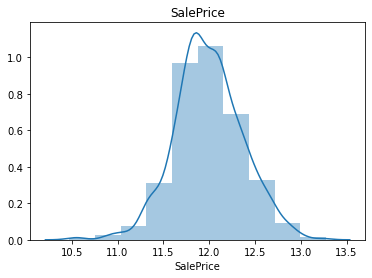

In [25]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

plt.title('SalePrice')
sns.distplot(df_train['SalePrice'], bins=10)
plt.show()

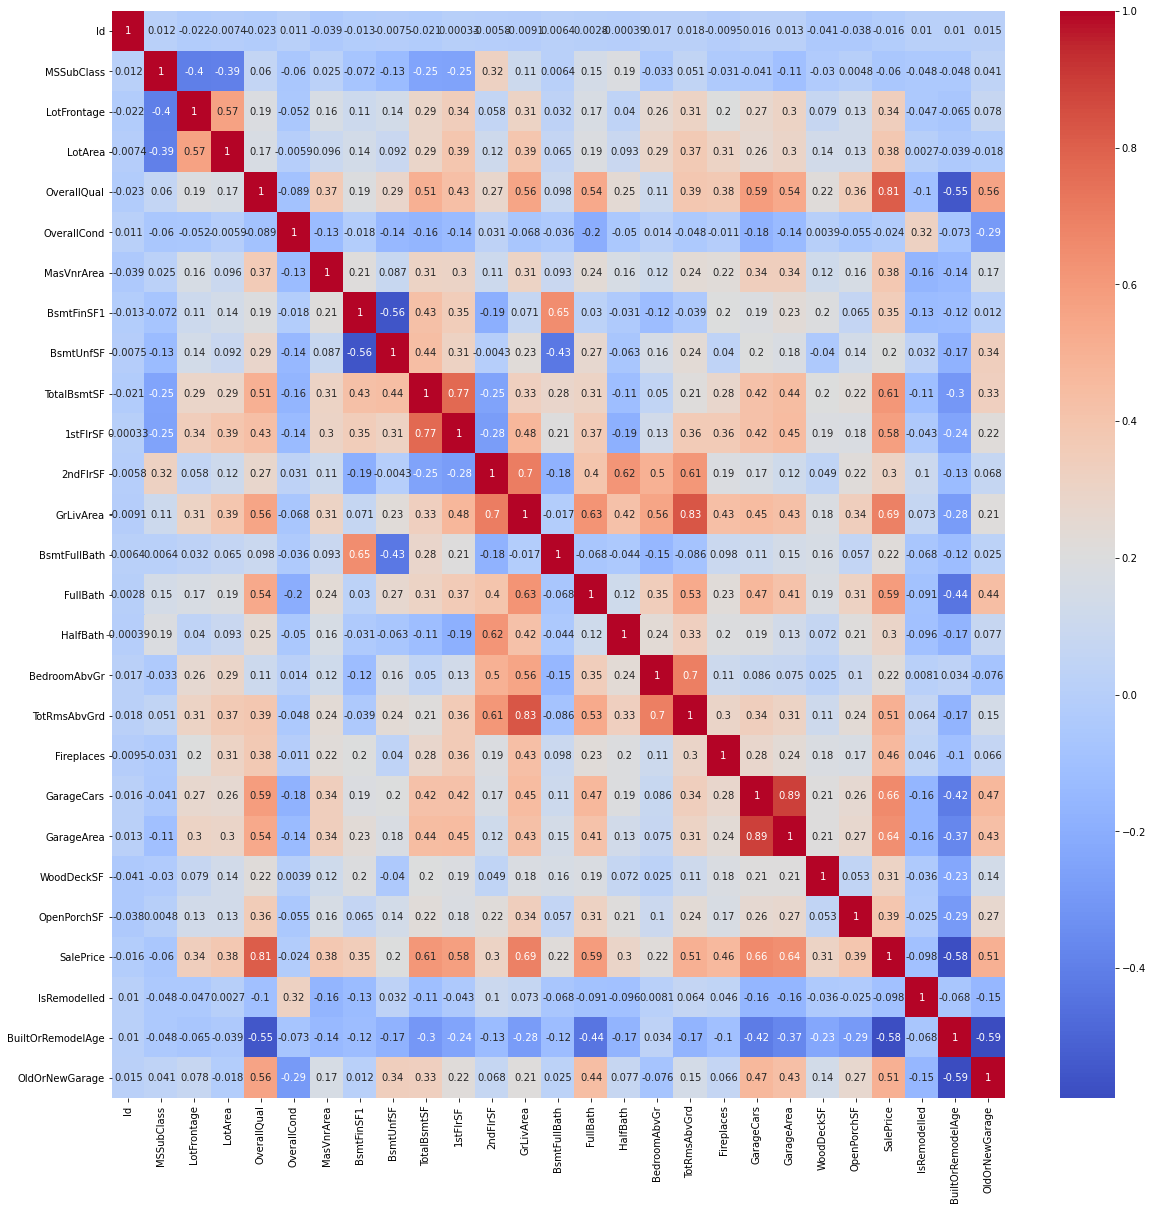

In [26]:
plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="coolwarm")
plt.show()

In [27]:
df_train.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [28]:
df_train.shape

(1358, 47)

# Data Preparation

In [29]:

df_train['d_LotShape'] = df_train['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df_train['d_ExterQual'] = df_train['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df_train['d_BsmtQual'] = df_train['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_train['d_BsmtExposure'] = df_train['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df_train['d_BsmtFinType1'] = df_train['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
df_train['d_HeatingQC'] = df_train['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_train['d_KitchenQual'] = df_train['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_train['d_FireplaceQu'] = df_train['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_train['d_GarageFinish'] = df_train['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
df_train['d_BldgType'] = df_train['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
df_train['d_HouseStyle'] = df_train['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
df_train['d_Fence'] = df_train['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
df_train['d_LotConfig'] = df_train['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
df_train['d_MasVnrType'] = df_train['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
df_train['d_SaleCondition'] = df_train['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  ...  d_HeatingQC  d_KitchenQual  \
0      CollgCr     1Fam     2Story  ...            5              4   
1      Veenker     1Fam     1Story  ...            5              3   
2      CollgCr     1Fam     2Story  ...            5              4   
3      Crawfor     1Fam     2Story  ...            4              4   
4      NoRidge     1Fam     2Story  ...            5              4   

  d_FireplaceQu d_GarageFinish d_BldgType d_HouseStyle  d_Fence d_LotConfig  \
0             0              2          1            4        0           5   
1             3              2          1            1        0           2   
2             3              2          1            4        0           5   
3             4              1          1            4        0           4   
4             3              2          1            4        0           2   

  d_MasVnrType d_SaleCondition  
0            1               1  
1            0               1  
2            1               1  
3            0               0  
4            1               1  

[5 rows x 62 columns]

In [30]:
df_train = df_train.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Neighborhood  OverallQual  \
0   1          60       RL         65.0     8450      CollgCr            7   
1   2          20       RL         80.0     9600      Veenker            6   
2   3          60       RL         68.0    11250      CollgCr            7   
3   4          70       RL         60.0     9550      Crawfor            7   
4   5          60       RL         84.0    14260      NoRidge            8   

   OverallCond RoofStyle Exterior1st  ... d_HeatingQC  d_KitchenQual  \
0            5     Gable     VinylSd  ...           5              4   
1            8     Gable     MetalSd  ...           5              3   
2            5     Gable     VinylSd  ...           5              4   
3            5     Gable     Wd Sdng  ...           4              4   
4            5     Gable     VinylSd  ...           5              4   

  d_FireplaceQu  d_GarageFinish  d_BldgType  d_HouseStyle  d_Fence  \
0             0               2           1             4        0   
1             3               2           1             1        0   
2             3               2           1             4        0   
3             4               1           1             4        0   
4             3               2           1             4        0   

   d_LotConfig  d_MasVnrType  d_SaleCondition  
0            5             1                1  
1            2             0                1  
2            5             1                1  
3            4             0                0  
4            2             1                1  

[5 rows x 47 columns]

In [31]:
d_MSZoning = pd.get_dummies(df_train['MSZoning'], prefix='MSZoning', drop_first = True)
df_train = pd.concat([df_train, d_MSZoning], axis = 1)

d_Neighborhood = pd.get_dummies(df_train['Neighborhood'], prefix='Neighborhood', drop_first = True)
h = pd.concat([df_train, d_Neighborhood], axis = 1)

d_RoofStyle = pd.get_dummies(df_train['RoofStyle'], prefix='RoofStyle', drop_first = True)
df_train = pd.concat([df_train, d_RoofStyle], axis = 1)

d_Exterior1st = pd.get_dummies(df_train['Exterior1st'], prefix='Exterior1st', drop_first = True)
df_train = pd.concat([df_train, d_Exterior1st], axis = 1)

d_Exterior2nd = pd.get_dummies(df_train['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
df_train = pd.concat([df_train, d_Exterior2nd], axis = 1)

d_Foundation = pd.get_dummies(df_train['Foundation'], prefix='Foundation', drop_first = True)
df_train = pd.concat([df_train, d_Foundation], axis = 1)

d_GarageType = pd.get_dummies(df_train['GarageType'], prefix='GarageType', drop_first = True)
df_train = pd.concat([df_train, d_GarageType], axis = 1)

df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Neighborhood  OverallQual  \
0   1          60       RL         65.0     8450      CollgCr            7   
1   2          20       RL         80.0     9600      Veenker            6   
2   3          60       RL         68.0    11250      CollgCr            7   
3   4          70       RL         60.0     9550      Crawfor            7   
4   5          60       RL         84.0    14260      NoRidge            8   

   OverallCond RoofStyle Exterior1st  ... Foundation_PConc  Foundation_Slab  \
0            5     Gable     VinylSd  ...                1                0   
1            8     Gable     MetalSd  ...                0                0   
2            5     Gable     VinylSd  ...                1                0   
3            5     Gable     Wd Sdng  ...                0                0   
4            5     Gable     VinylSd  ...                1                0   

  Foundation_Stone  Foundation_Wood  GarageType_Attchd  GarageType_Basment  \
0                0                0                  1                   0   
1                0                0                  1                   0   
2                0                0                  1                   0   
3                0                0                  0                   0   
4                0                0                  1                   0   

   GarageType_BuiltIn  GarageType_CarPort  GarageType_Detchd  GarageType_None  
0                   0                   0                  0                0  
1                   0                   0                  0                0  
2                   0                   0                  0                0  
3                   0                   0                  1                0  
4                   0                   0                  0                0  

[5 rows x 96 columns]

In [32]:
df_train = df_train.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

df_train.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0   1          60         65.0     8450            7            5       196.0   
1   2          20         80.0     9600            6            8         0.0   
2   3          60         68.0    11250            7            5       162.0   
3   4          70         60.0     9550            7            5         0.0   
4   5          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  ...  Foundation_PConc  Foundation_Slab  \
0         706        150          856  ...                 1                0   
1         978        284         1262  ...                 0                0   
2         486        434          920  ...                 1                0   
3         216        540          756  ...                 0                0   
4         655        490         1145  ...                 1                0   

   Foundation_Stone  Foundation_Wood  GarageType_Attchd  GarageType_Basment  \
0                 0                0                  1                   0   
1                 0                0                  1                   0   
2                 0                0                  1                   0   
3                 0                0                  0                   0   
4                 0                0                  1                   0   

   GarageType_BuiltIn  GarageType_CarPort  GarageType_Detchd  GarageType_None  
0                   0                   0                  0                0  
1                   0                   0                  0                0  
2                   0                   0                  0                0  
3                   0                   0                  1                0  
4                   0                   0                  0                0  

[5 rows x 89 columns]

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Data columns (total 89 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1358 non-null   int64  
 1   MSSubClass           1358 non-null   int64  
 2   LotFrontage          1358 non-null   float64
 3   LotArea              1358 non-null   int64  
 4   OverallQual          1358 non-null   int64  
 5   OverallCond          1358 non-null   int64  
 6   MasVnrArea           1358 non-null   float64
 7   BsmtFinSF1           1358 non-null   int64  
 8   BsmtUnfSF            1358 non-null   int64  
 9   TotalBsmtSF          1358 non-null   int64  
 10  1stFlrSF             1358 non-null   int64  
 11  2ndFlrSF             1358 non-null   int64  
 12  GrLivArea            1358 non-null   int64  
 13  BsmtFullBath         1358 non-null   int64  
 14  FullBath             1358 non-null   int64  
 15  HalfBath             1358 non-null   i

# Train_Test_Split

In [34]:
    X = df_train.drop(['SalePrice'], axis=1)
    X.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0   1          60         65.0     8450            7            5       196.0   
1   2          20         80.0     9600            6            8         0.0   
2   3          60         68.0    11250            7            5       162.0   
3   4          70         60.0     9550            7            5         0.0   
4   5          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  ...  Foundation_PConc  Foundation_Slab  \
0         706        150          856  ...                 1                0   
1         978        284         1262  ...                 0                0   
2         486        434          920  ...                 1                0   
3         216        540          756  ...                 0                0   
4         655        490         1145  ...                 1                0   

   Foundation_Stone  Foundation_Wood  GarageType_Attchd  GarageType_Basment  \
0                 0                0                  1                   0   
1                 0                0                  1                   0   
2                 0                0                  1                   0   
3                 0                0                  0                   0   
4                 0                0                  1                   0   

   GarageType_BuiltIn  GarageType_CarPort  GarageType_Detchd  GarageType_None  
0                   0                   0                  0                0  
1                   0                   0                  0                0  
2                   0                   0                  0                0  
3                   0                   0                  1                0  
4                   0                   0                  0                0  

[5 rows x 88 columns]

In [35]:
y = df_train['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [36]:
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', 'IsRemodelled', 'BuiltOrRemodelAge', 'OldOrNewGarage',
       'd_LotShape', 'd_ExterQual', 'd_BsmtQual', 'd_BsmtExposure',
       'd_BsmtFinType1', 'd_HeatingQC', 'd_KitchenQual', 'd_FireplaceQu',
       'd_GarageFinish', 'd_BldgType', 'd_HouseStyle', 'd_Fence',
       'd_LotConfig', 'd_MasVnrType', 'd_SaleCondition', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=101)

# RFE

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [39]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=50 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [40]:
col = X_train.columns[rfe.support_]

temp_df_train = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df_train = temp_df_train.loc[temp_df_train['rfe_support'] == True]
temp_df_train.reset_index(drop=True, inplace=True)

temp_df_train

Variable  rfe_support  rfe_ranking
0           LotFrontage         True            1
1               LotArea         True            1
2           OverallQual         True            1
3           OverallCond         True            1
4            BsmtFinSF1         True            1
5           TotalBsmtSF         True            1
6             GrLivArea         True            1
7          BsmtFullBath         True            1
8              FullBath         True            1
9              HalfBath         True            1
10           Fireplaces         True            1
11           GarageCars         True            1
12           WoodDeckSF         True            1
13          OpenPorchSF         True            1
14    BuiltOrRemodelAge         True            1
15       OldOrNewGarage         True            1
16           d_BsmtQual         True            1
17       d_BsmtExposure         True            1
18       d_BsmtFinType1         True            1
19          d_HeatingQC         True            1
20        d_KitchenQual         True            1
21        d_FireplaceQu         True            1
22              d_Fence         True            1
23      d_SaleCondition         True            1
24          MSZoning_FV         True            1
25          MSZoning_RH         True            1
26          MSZoning_RL         True            1
27          MSZoning_RM         True            1
28       RoofStyle_Shed         True            1
29  Exterior1st_BrkComm         True            1
30  Exterior1st_BrkFace         True            1
31  Exterior1st_Plywood         True            1
32   Exterior1st_Stucco         True            1
33  Exterior1st_VinylSd         True            1
34  Exterior1st_Wd Sdng         True            1
35  Exterior2nd_Brk Cmn         True            1
36  Exterior2nd_CmentBd         True            1
37  Exterior2nd_HdBoard         True            1
38  Exterior2nd_MetalSd         True            1
39  Exterior2nd_Plywood         True            1
40    Exterior2nd_Stone         True            1
41  Exterior2nd_VinylSd         True            1
42  Exterior2nd_Wd Sdng         True            1
43    Foundation_CBlock         True            1
44     Foundation_PConc         True            1
45      Foundation_Slab         True            1
46    GarageType_Attchd         True            1
47   GarageType_Basment         True            1
48   GarageType_BuiltIn         True            1
49    GarageType_Detchd         True            1

In [41]:
X_train_rfe = X_train[col]
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

# Model Evaluation
### Lasso

In [42]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [43]:
lasso = Lasso()

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [44]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
3       0.0004         -0.075865        -0.082164                1
4       0.0005         -0.075956        -0.082165                2
2       0.0003         -0.075786        -0.082185                3
1       0.0002         -0.075719        -0.082217                4
0       0.0001         -0.075653        -0.082238                5
5        0.001         -0.076446        -0.082295                6
6        0.002         -0.077341        -0.082506                7
7        0.003         -0.078100        -0.082835                8
8        0.004         -0.078742        -0.083371                9
9        0.005         -0.079321        -0.083879               10
10        0.01         -0.082236        -0.086537               11

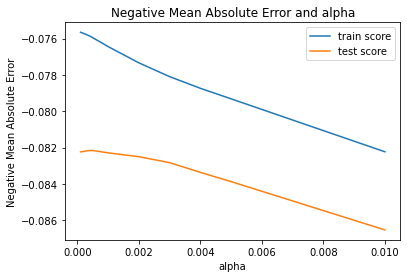

In [45]:
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

cc

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [46]:
lasso_model_cv.best_estimator_

Lasso(alpha=0.0004)

In [47]:
alpha = 0.0004

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.01231218,  0.01729216,  0.09003561,  0.04657286,  0.02295815,
        0.04808222,  0.09986675,  0.01431694,  0.01030277,  0.01093716,
        0.01400879,  0.03872822,  0.00835393,  0.01337839, -0.01044105,
        0.01582123,  0.01229476,  0.01070483,  0.01075584,  0.01302659,
        0.02066654,  0.00700864, -0.00598165,  0.01952593,  0.02723269,
        0.00635307,  0.03909307,  0.        , -0.0067723 , -0.02170154,
        0.01946624, -0.00542179,  0.00893012, -0.        , -0.00866328,
        0.00417426,  0.01067363,  0.01034565,  0.01175239,  0.01298377,
        0.00607998,  0.0210019 ,  0.01183678,  0.02439737,  0.03481227,
        0.01481333,  0.03334519,  0.00575768,  0.02314086,  0.02347714])

In [48]:
mean_squared_error(y_test, lasso.predict(X_test))

0.019722568610301715

In [49]:
lasso_df_train = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df_train = lasso_df_train[lasso_df_train['Coefficient'] != 0.00]
lasso_df_train.reset_index(drop=True, inplace=True)
lasso_df_train

Features  Coefficient
0           LotFrontage       0.0123
1               LotArea       0.0173
2           OverallQual       0.0900
3           OverallCond       0.0466
4            BsmtFinSF1       0.0230
5           TotalBsmtSF       0.0481
6             GrLivArea       0.0999
7          BsmtFullBath       0.0143
8              FullBath       0.0103
9              HalfBath       0.0109
10           Fireplaces       0.0140
11           GarageCars       0.0387
12           WoodDeckSF       0.0084
13          OpenPorchSF       0.0134
14    BuiltOrRemodelAge      -0.0104
15       OldOrNewGarage       0.0158
16           d_BsmtQual       0.0123
17       d_BsmtExposure       0.0107
18       d_BsmtFinType1       0.0108
19          d_HeatingQC       0.0130
20        d_KitchenQual       0.0207
21        d_FireplaceQu       0.0070
22              d_Fence      -0.0060
23      d_SaleCondition       0.0195
24          MSZoning_FV       0.0272
25          MSZoning_RH       0.0064
26          MSZoning_RL       0.0391
27       RoofStyle_Shed      -0.0068
28  Exterior1st_BrkComm      -0.0217
29  Exterior1st_BrkFace       0.0195
30  Exterior1st_Plywood      -0.0054
31   Exterior1st_Stucco       0.0089
32  Exterior1st_Wd Sdng      -0.0087
33  Exterior2nd_Brk Cmn       0.0042
34  Exterior2nd_CmentBd       0.0107
35  Exterior2nd_HdBoard       0.0103
36  Exterior2nd_MetalSd       0.0118
37  Exterior2nd_Plywood       0.0130
38    Exterior2nd_Stone       0.0061
39  Exterior2nd_VinylSd       0.0210
40  Exterior2nd_Wd Sdng       0.0118
41    Foundation_CBlock       0.0244
42     Foundation_PConc       0.0348
43      Foundation_Slab       0.0148
44    GarageType_Attchd       0.0333
45   GarageType_Basment       0.0058
46   GarageType_BuiltIn       0.0231
47    GarageType_Detchd       0.0235

In [50]:
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotFrontage': 0.0123121835075133,
 'LotArea': 0.017292157214754595,
 'OverallQual': 0.09003560795261296,
 'OverallCond': 0.04657285694133675,
 'BsmtFinSF1': 0.02295814824386356,
 'TotalBsmtSF': 0.04808221602416584,
 'GrLivArea': 0.09986674648739585,
 'BsmtFullBath': 0.014316937799462064,
 'FullBath': 0.010302770918288975,
 'HalfBath': 0.01093715999966838,
 'Fireplaces': 0.014008794567012922,
 'GarageCars': 0.03872822477680353,
 'WoodDeckSF': 0.008353927256283054,
 'OpenPorchSF': 0.01337839325215594,
 'BuiltOrRemodelAge': -0.010441049855215958,
 'OldOrNewGarage': 0.015821229940598733,
 'd_BsmtQual': 0.012294758882902768,
 'd_BsmtExposure': 0.010704832595607781,
 'd_BsmtFinType1': 0.010755836934077783,
 'd_HeatingQC': 0.013026593641508407,
 'd_KitchenQual': 0.020666542538729973,
 'd_FireplaceQu': 0.0070086406841813114,
 'd_Fence': -0.005981649260386309,
 'd_SaleCondition': 0.019525934475204093,
 'MSZoning_FV': 0.02723268678542626,
 'MSZoning_RH': 0.006353069150249899,
 'MSZoning_RL': 0

#### RFE

In [51]:
X_train_lasso = X_train[lasso_df_train.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [52]:
def find(x):
    return lasso_coeff_dict[x]

temp2_df_train = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df_train = temp2_df_train.loc[temp2_df_train['rfe_support'] == True]
temp2_df_train.reset_index(drop=True, inplace=True)

temp2_df_train['Coefficient'] = temp2_df_train['Features'].apply(find)
temp2_df_train = temp2_df_train.sort_values(by=['Coefficient'], ascending=False)
temp2_df_train = temp2_df_train.head(10)
temp2_df_train

Features  rfe_support  rfe_ranking  Coefficient
5           GrLivArea         True            1     0.099867
1         OverallQual         True            1     0.090036
4         TotalBsmtSF         True            1     0.048082
2         OverallCond         True            1     0.046573
12        MSZoning_RL         True            1     0.039093
7          GarageCars         True            1     0.038728
14   Foundation_PConc         True            1     0.034812
11        MSZoning_FV         True            1     0.027233
13  Foundation_CBlock         True            1     0.024397
3          BsmtFinSF1         True            1     0.022958

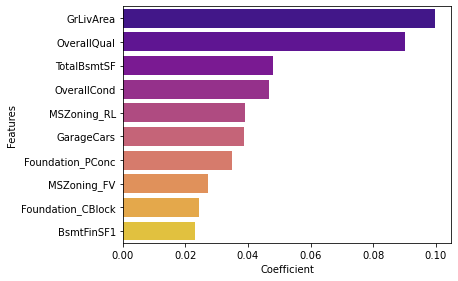

In [53]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
    sns.barplot(y = 'Features', x='Coefficient', palette='plasma', data = temp2_df_train)
plt.show()

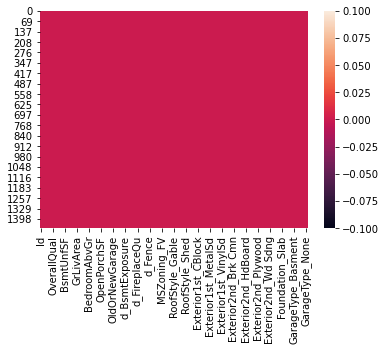

In [54]:
sns.heatmap(df_train.isnull())

In [55]:
df_train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', 'SalePrice', 'IsRemodelled', 'BuiltOrRemodelAge',
       'OldOrNewGarage', 'd_LotShape', 'd_ExterQual', 'd_BsmtQual',
       'd_BsmtExposure', 'd_BsmtFinType1', 'd_HeatingQC', 'd_KitchenQual',
       'd_FireplaceQu', 'd_GarageFinish', 'd_BldgType', 'd_HouseStyle',
       'd_Fence', 'd_LotConfig', 'd_MasVnrType', 'd_SaleCondition',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc',

In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Data columns (total 89 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1358 non-null   int64  
 1   MSSubClass           1358 non-null   int64  
 2   LotFrontage          1358 non-null   float64
 3   LotArea              1358 non-null   int64  
 4   OverallQual          1358 non-null   int64  
 5   OverallCond          1358 non-null   int64  
 6   MasVnrArea           1358 non-null   float64
 7   BsmtFinSF1           1358 non-null   int64  
 8   BsmtUnfSF            1358 non-null   int64  
 9   TotalBsmtSF          1358 non-null   int64  
 10  1stFlrSF             1358 non-null   int64  
 11  2ndFlrSF             1358 non-null   int64  
 12  GrLivArea            1358 non-null   int64  
 13  BsmtFullBath         1358 non-null   int64  
 14  FullBath             1358 non-null   int64  
 15  HalfBath             1358 non-null   i

In [63]:
req_features = ['Id','GrLivArea','OverallQual','TotalBsmtSF','OverallCond','MSZoning_RL','GarageCars','Foundation_PConc','MSZoning_FV','Foundation_CBlock','BsmtFinSF1']
target = 'SalePrice'

# Test Data

In [58]:
df_test = pd.read_csv('test.csv')

In [59]:
df_train.head(0)

Empty DataFrame
Columns: [Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, MasVnrArea, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, Fireplaces, GarageCars, WoodDeckSF, OpenPorchSF, SalePrice, IsRemodelled, BuiltOrRemodelAge, OldOrNewGarage, d_LotShape, d_ExterQual, d_BsmtQual, d_BsmtExposure, d_BsmtFinType1, d_HeatingQC, d_KitchenQual, d_FireplaceQu, d_GarageFinish, d_BldgType, d_HouseStyle, d_Fence, d_LotConfig, d_MasVnrType, d_SaleCondition, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, RoofStyle_Gable, RoofStyle_Gambrel, RoofStyle_Hip, RoofStyle_Mansard, RoofStyle_Shed, Exterior1st_AsphShn, Exterior1st_BrkComm, Exterior1st_BrkFace, Exterior1st_CBlock, Exterior1st_CemntBd, Exterior1st_HdBoard, Exterior1st_ImStucc, Exterior1st_MetalSd, Exterior1st_Plywood, Exterior1st_Stone, Exterior1st_Stucco, Exterior1st_VinylSd, Exterior1st_Wd Sdng, Exterior1st_WdShing, Exterior2nd_AsphShn, Exterior2nd_Brk Cmn, Exterior2nd_BrkFace, Exterior2nd_CBlock, Exterior2nd_CmentBd, Exterior2nd_HdBoard, Exterior2nd_ImStucc, Exterior2nd_MetalSd, Exterior2nd_Other, Exterior2nd_Plywood, Exterior2nd_Stone, Exterior2nd_Stucco, Exterior2nd_VinylSd, Exterior2nd_Wd Sdng, Exterior2nd_Wd Shng, Foundation_CBlock, Foundation_PConc, Foundation_Slab, Foundation_Stone, Foundation_Wood, GarageType_Attchd, GarageType_Basment, GarageType_BuiltIn, GarageType_CarPort, GarageType_Detchd, GarageType_None]
Index: []

[0 rows x 89 columns]

In [60]:
df_test.head(0)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

[0 rows x 80 columns]

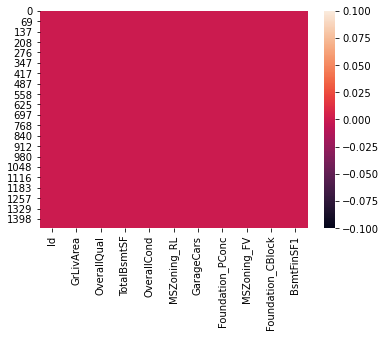

In [65]:
sns.heatmap(df_train[req_features].isnull())

# Data Cleaning 

In [67]:
df_test.select_dtypes(include='object').isnull().sum()[df_test.select_dtypes(include='object').isnull().sum()>0]

MSZoning           4
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageFinish      78
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [68]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [69]:
for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    df_test[col]=df_test[col].fillna('None')

In [70]:
df_test[col]=df_test[col].fillna('None')
def getHighCategoricalValueCounts():
    column = []
    categorical_columns = df_test.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(df_test[col].value_counts().max() >= 1241):
            column.append(col)	
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()

# Remove the columns with skewed data

df_test.drop(columnsToBeRemoved, axis = 1, inplace = True)

df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0  1461          20       RH         80.0    11622      Reg    Inside   
1  1462          20       RL         81.0    14267      IR1    Corner   
2  1463          60       RL         74.0    13830      IR1    Inside   
3  1464          60       RL         78.0     9978      IR1    Inside   
4  1465         120       RL         43.0     5005      IR1    Inside   

  Neighborhood BldgType HouseStyle  ...  OpenPorchSF  EnclosedPorch  \
0        NAmes     1Fam     1Story  ...            0              0   
1        NAmes     1Fam     1Story  ...           36              0   
2      Gilbert     1Fam     2Story  ...           34              0   
3      Gilbert     1Fam     2Story  ...           36              0   
4      StoneBr   TwnhsE     1Story  ...           82              0   

   3SsnPorch  ScreenPorch PoolArea  Fence MiscVal MoSold  YrSold SaleCondition  
0          0          120        0  MnPrv       0      6    2010        Normal  
1          0            0        0   None   12500      6    2010        Normal  
2          0            0        0  MnPrv       0      3    2010        Normal  
3          0            0        0   None       0      6    2010        Normal  
4          0          144        0   None       0      1    2010        Normal  

[5 rows x 60 columns]

In [71]:
df_test.select_dtypes(include='object').isnull().sum()[df_test.select_dtypes(include='object').isnull().sum()>0]

MSZoning       4
Exterior1st    1
Exterior2nd    1
KitchenQual    1
dtype: int64

In [72]:
df_test.select_dtypes(include=['int64','float']).isnull().sum()[df_test.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64

In [73]:
df_test['LotFrontage'] = df_test['LotFrontage'].replace(np.nan, df_test['LotFrontage'].median())
df_test['MasVnrArea'] = df_test['MasVnrArea'].replace(np.nan, df_test['MasVnrArea'].median())
df_test['GarageYrBlt']= df_test['GarageYrBlt'].fillna(0)
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].astype(int)

In [74]:
def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
df_test['IsRemodelled'] = df_test.apply(checkForRemodel, axis=1)
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0  1461          20       RH         80.0    11622      Reg    Inside   
1  1462          20       RL         81.0    14267      IR1    Corner   
2  1463          60       RL         74.0    13830      IR1    Inside   
3  1464          60       RL         78.0     9978      IR1    Inside   
4  1465         120       RL         43.0     5005      IR1    Inside   

  Neighborhood BldgType HouseStyle  ...  EnclosedPorch  3SsnPorch  \
0        NAmes     1Fam     1Story  ...              0          0   
1        NAmes     1Fam     1Story  ...              0          0   
2      Gilbert     1Fam     2Story  ...              0          0   
3      Gilbert     1Fam     2Story  ...              0          0   
4      StoneBr   TwnhsE     1Story  ...              0          0   

   ScreenPorch  PoolArea  Fence MiscVal MoSold YrSold  SaleCondition  \
0          120         0  MnPrv       0      6   2010         Normal   
1            0         0   None   12500      6   2010         Normal   
2            0         0  MnPrv       0      3   2010         Normal   
3            0         0   None       0      6   2010         Normal   
4          144         0   None       0      1   2010         Normal   

  IsRemodelled  
0            0  
1            0  
2            1  
3            0  
4            0  

[5 rows x 61 columns]

In [75]:
def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
df_test['BuiltOrRemodelAge'] = df_test.apply(getBuiltOrRemodelAge, axis=1)
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0  1461          20       RH         80.0    11622      Reg    Inside   
1  1462          20       RL         81.0    14267      IR1    Corner   
2  1463          60       RL         74.0    13830      IR1    Inside   
3  1464          60       RL         78.0     9978      IR1    Inside   
4  1465         120       RL         43.0     5005      IR1    Inside   

  Neighborhood BldgType HouseStyle  ...  3SsnPorch  ScreenPorch  PoolArea  \
0        NAmes     1Fam     1Story  ...          0          120         0   
1        NAmes     1Fam     1Story  ...          0            0         0   
2      Gilbert     1Fam     2Story  ...          0            0         0   
3      Gilbert     1Fam     2Story  ...          0            0         0   
4      StoneBr   TwnhsE     1Story  ...          0          144         0   

   Fence MiscVal MoSold YrSold SaleCondition  IsRemodelled BuiltOrRemodelAge  
0  MnPrv       0      6   2010        Normal             0                49  
1   None   12500      6   2010        Normal             0                52  
2  MnPrv       0      3   2010        Normal             1                12  
3   None       0      6   2010        Normal             0                12  
4   None       0      1   2010        Normal             0                18  

[5 rows x 62 columns]

In [76]:
def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
df_test['OldOrNewGarage'] = df_test['GarageYrBlt'].apply(getGarageConstructionPeriod)
df_test.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0  1461          20       RH         80.0    11622      Reg    Inside   
1  1462          20       RL         81.0    14267      IR1    Corner   
2  1463          60       RL         74.0    13830      IR1    Inside   
3  1464          60       RL         78.0     9978      IR1    Inside   
4  1465         120       RL         43.0     5005      IR1    Inside   

  Neighborhood BldgType HouseStyle  ...  ScreenPorch  PoolArea  Fence  \
0        NAmes     1Fam     1Story  ...          120         0  MnPrv   
1        NAmes     1Fam     1Story  ...            0         0   None   
2      Gilbert     1Fam     2Story  ...            0         0  MnPrv   
3      Gilbert     1Fam     2Story  ...            0         0   None   
4      StoneBr   TwnhsE     1Story  ...          144         0   None   

   MiscVal MoSold YrSold SaleCondition IsRemodelled  BuiltOrRemodelAge  \
0        0      6   2010        Normal            0                 49   
1    12500      6   2010        Normal            0                 52   
2        0      3   2010        Normal            1                 12   
3        0      6   2010        Normal            0                 12   
4        0      1   2010        Normal            0                 18   

  OldOrNewGarage  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 63 columns]

In [77]:
df_test.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [78]:
def getHighNumericalValueCounts():
    column = []
    numerical_columns = df_test.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(df_test[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
df_test.drop(columnsToBeRemoved, axis = 1, inplace = True)

df_test.drop(['MoSold'], axis = 1, inplace = True)

df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0  1461          20       RH         80.0    11622      Reg    Inside   
1  1462          20       RL         81.0    14267      IR1    Corner   
2  1463          60       RL         74.0    13830      IR1    Inside   
3  1464          60       RL         78.0     9978      IR1    Inside   
4  1465         120       RL         43.0     5005      IR1    Inside   

  Neighborhood BldgType HouseStyle  ...  GarageCars  GarageArea WoodDeckSF  \
0        NAmes     1Fam     1Story  ...         1.0       730.0        140   
1        NAmes     1Fam     1Story  ...         1.0       312.0        393   
2      Gilbert     1Fam     2Story  ...         2.0       482.0        212   
3      Gilbert     1Fam     2Story  ...         2.0       470.0        360   
4      StoneBr   TwnhsE     1Story  ...         2.0       506.0          0   

  OpenPorchSF EnclosedPorch  Fence  SaleCondition IsRemodelled  \
0           0             0  MnPrv         Normal            0   
1          36             0   None         Normal            0   
2          34             0  MnPrv         Normal            1   
3          36             0   None         Normal            0   
4          82             0   None         Normal            0   

  BuiltOrRemodelAge OldOrNewGarage  
0                49              0  
1                52              0  
2                12              0  
3                12              0  
4                18              0  

[5 rows x 50 columns]

In [79]:
percent_missing = round(100*(df_test.isnull().sum()/len(df_test.index)), 2)
print(percent_missing)

Id                   0.00
MSSubClass           0.00
MSZoning             0.27
LotFrontage          0.00
LotArea              0.00
LotShape             0.00
LotConfig            0.00
Neighborhood         0.00
BldgType             0.00
HouseStyle           0.00
OverallQual          0.00
OverallCond          0.00
RoofStyle            0.00
Exterior1st          0.07
Exterior2nd          0.07
MasVnrType           0.00
MasVnrArea           0.00
ExterQual            0.00
Foundation           0.00
BsmtQual             0.00
BsmtExposure         0.00
BsmtFinType1         0.00
BsmtFinSF1           0.07
BsmtFinType2         0.00
BsmtUnfSF            0.07
TotalBsmtSF          0.07
HeatingQC            0.00
1stFlrSF             0.00
2ndFlrSF             0.00
GrLivArea            0.00
BsmtFullBath         0.14
FullBath             0.00
HalfBath             0.00
BedroomAbvGr         0.00
KitchenQual          0.07
TotRmsAbvGrd         0.00
Fireplaces           0.00
FireplaceQu          0.00
GarageType  

In [80]:
df_test[df_test.duplicated(keep=False)]   

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, LotShape, LotConfig, Neighborhood, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, Foundation, BsmtQual, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, FireplaceQu, GarageType, GarageFinish, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, Fence, SaleCondition, IsRemodelled, BuiltOrRemodelAge, OldOrNewGarage]
Index: []

[0 rows x 50 columns]

In [81]:
df_test.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1459.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.334476   9819.161069     6.078821   
std     421.321334    42.746880    20.569211   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    60.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    78.000000  11517.500000     7.000000   
90%    2773.200000   120.000000    91.000000  14259.000000     8.000000   
95%    2846.100000   160.000000   105.000000  16873.000000     9.000000   
99%    2904.420000   190.000000   129.420000  26210.340000     9.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond   MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF  ...  \
count  1459.000000  1459.000000  1458.000000  1458.000000  1458.000000  ...   
mean      5.553804    99.673749   439.203704   554.294925  1046.117970  ...   
std       1.113740   177.001792   455.268042   437.260486   442.898624  ...   
min       1.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       5.000000     0.000000     0.000000   219.250000   784.000000  ...   
50%       5.000000     0.000000   350.500000   460.000000   988.000000  ...   
75%       6.000000   162.000000   753.500000   797.750000  1305.000000  ...   
90%       7.000000   309.200000  1039.800000  1195.900000  1615.600000  ...   
95%       8.000000   473.700000  1290.600000  1488.450000  1782.000000  ...   
99%       9.000000   735.680000  1682.860000  1731.440000  2203.440000  ...   
max       9.000000  1290.000000  4010.000000  2140.000000  5095.000000  ...   

       TotRmsAbvGrd  Fireplaces   GarageCars   GarageArea   WoodDeckSF  \
count   1459.000000  1459.00000  1458.000000  1458.000000  1459.000000   
mean       6.385195     0.58122     1.766118   472.768861    93.174777   
std        1.508895     0.64742     0.775945   217.048611   127.744882   
min        3.000000     0.00000     0.000000     0.000000     0.000000   
25%        5.000000     0.00000     1.000000   318.000000     0.000000   
50%        6.000000     0.00000     2.000000   480.000000     0.000000   
75%        7.000000     1.00000     2.000000   576.000000   168.000000   
90%        8.000000     1.00000     3.000000   758.000000   256.000000   
95%        9.000000     2.00000     3.000000   864.000000   319.000000   
99%       11.000000     2.00000     3.000000  1040.430000   492.520000   
max       15.000000     4.00000     5.000000  1488.000000  1424.000000   

       OpenPorchSF  EnclosedPorch  IsRemodelled  BuiltOrRemodelAge  \
count  1459.000000    1459.000000   1459.000000        1459.000000   
mean     48.313914      24.243317      0.455106          24.106923   
std      68.883364      67.227765      0.499526          21.131883   
min       0.000000       0.000000      0.000000          -2.000000   
25%       0.000000       0.000000      0.000000           4.000000   
50%      28.000000       0.000000      0.000000          16.000000   
75%      72.000000       0.000000      1.000000          44.000000   
90%     132.200000     112.000000      1.000000          56.000000   
95%     189.000000     169.100000      1.000000          58.000000   
99%     276.840000     264.420000      1.000000          60.000000   
max     742.000000    1012.000000      2.000000          60.000000   

       OldOrNewGarage  
count     1459.000000  
mean         0.279644  
std          0.448978  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          1.000000  
90%          1.000000  
95%          1.000000  
99%          1.000000  
max          1.000000  

[11 rows x 27 columns]

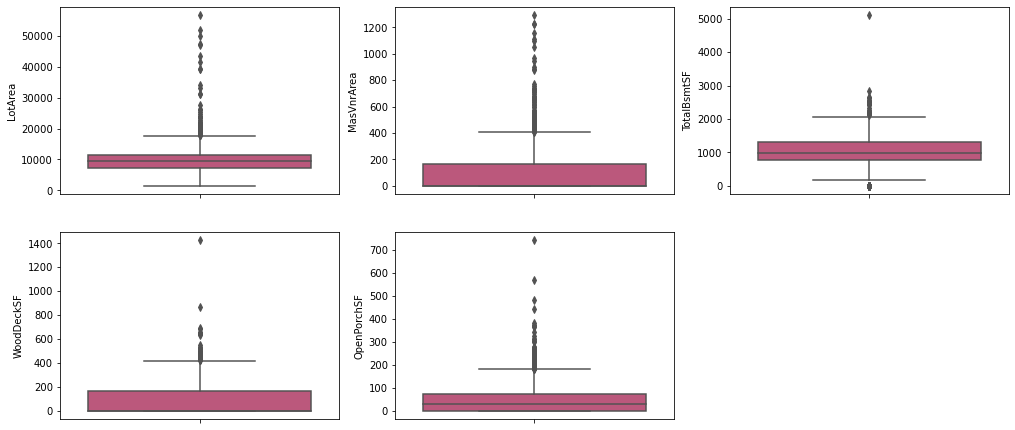

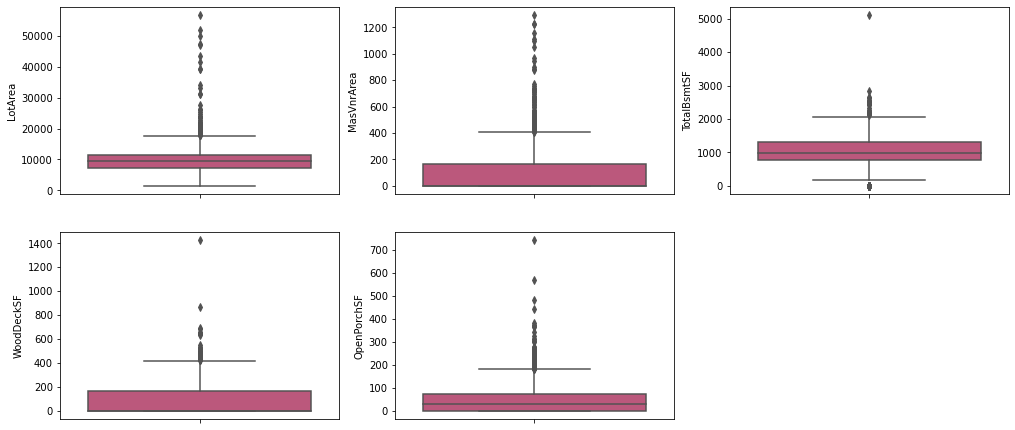

In [82]:
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='plasma', data = df_test)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='plasma', data = df_test)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='plasma', data = df_test)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='plasma', data = df_test)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='plasma', data = df_test)
plt.show()
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='plasma', data = df_test)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='plasma', data = df_test)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='plasma', data = df_test)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='plasma', data = df_test)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='plasma', data = df_test)
plt.show()


In [83]:
nn_quartile_LotArea = df_test['LotArea'].quantile(0.98)
df_test = df_test[df_test["LotArea"] < nn_quartile_LotArea]

nn_quartile_MasVnrArea = df_test['MasVnrArea'].quantile(0.98)
df_test = df_test[df_test["MasVnrArea"] < nn_quartile_MasVnrArea]

nn_quartile_TotalBsmtSF = df_test['TotalBsmtSF'].quantile(0.99)
df_test = df_test[df_test["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

nn_quartile_WoodDeckSF = df_test['WoodDeckSF'].quantile(0.99)
df_test = df_test[df_test["WoodDeckSF"] < nn_quartile_WoodDeckSF]

nn_quartile_OpenPorchSF = df_test['OpenPorchSF'].quantile(0.99)
df_test = df_test[df_test["OpenPorchSF"] < nn_quartile_OpenPorchSF]

num_data = round(100*(len(df_test)/1460),2)
print(num_data)

92.95


# Data Visualization

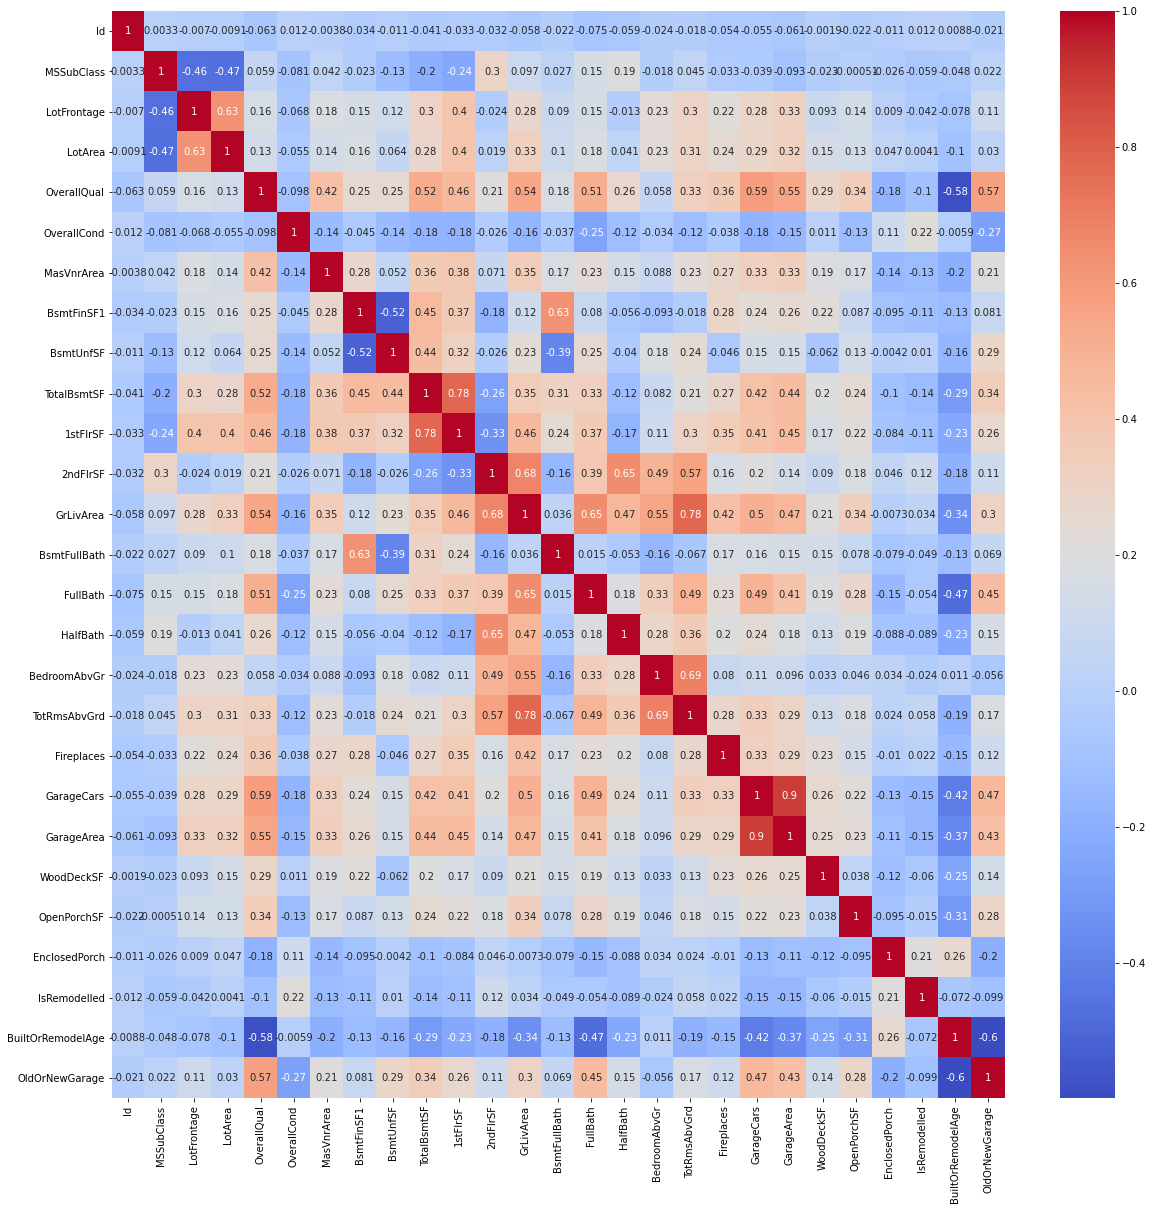

In [86]:
plt.figure(figsize = (20, 20))
sns.heatmap(df_test.corr(), annot = True, cmap="coolwarm")
plt.show()

In [87]:
df_test.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [88]:
df_test.shape

(1357, 48)

# Data Preparation

In [89]:
df_test['d_LotShape'] = df_test['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df_test['d_ExterQual'] = df_test['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df_test['d_BsmtQual'] = df_test['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_test['d_BsmtExposure'] = df_test['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df_test['d_BsmtFinType1'] = df_test['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
df_test['d_HeatingQC'] = df_test['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_test['d_KitchenQual'] = df_test['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_test['d_FireplaceQu'] = df_test['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_test['d_GarageFinish'] = df_test['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
df_test['d_BldgType'] = df_test['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
df_test['d_HouseStyle'] = df_test['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
df_test['d_Fence'] = df_test['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
df_test['d_LotConfig'] = df_test['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
df_test['d_MasVnrType'] = df_test['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
df_test['d_SaleCondition'] = df_test['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0  1461          20       RH         80.0    11622      Reg    Inside   
1  1462          20       RL         81.0    14267      IR1    Corner   
2  1463          60       RL         74.0    13830      IR1    Inside   
3  1464          60       RL         78.0     9978      IR1    Inside   
4  1465         120       RL         43.0     5005      IR1    Inside   

  Neighborhood BldgType HouseStyle  ...  d_HeatingQC  d_KitchenQual  \
0        NAmes     1Fam     1Story  ...            3            3.0   
1        NAmes     1Fam     1Story  ...            3            4.0   
2      Gilbert     1Fam     2Story  ...            4            3.0   
3      Gilbert     1Fam     2Story  ...            5            4.0   
4      StoneBr   TwnhsE     1Story  ...            5            4.0   

  d_FireplaceQu d_GarageFinish d_BldgType d_HouseStyle  d_Fence d_LotConfig  \
0             0              1          1            1        2           5   
1             0              1          1            1        0           4   
2             3              3          1            4        2           5   
3             4              3          1            4        0           5   
4             0              2          4            1        0           5   

  d_MasVnrType d_SaleCondition  
0            0               1  
1            1               1  
2            0               1  
3            1               1  
4            0               1  

[5 rows x 63 columns]

In [90]:
df_test = df_test.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

In [91]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Neighborhood  OverallQual  \
0  1461          20       RH         80.0    11622        NAmes            5   
1  1462          20       RL         81.0    14267        NAmes            6   
2  1463          60       RL         74.0    13830      Gilbert            5   
3  1464          60       RL         78.0     9978      Gilbert            6   
4  1465         120       RL         43.0     5005      StoneBr            8   

   OverallCond RoofStyle Exterior1st  ... d_HeatingQC  d_KitchenQual  \
0            6     Gable     VinylSd  ...           3            3.0   
1            6       Hip     Wd Sdng  ...           3            4.0   
2            5     Gable     VinylSd  ...           4            3.0   
3            6     Gable     VinylSd  ...           5            4.0   
4            5     Gable     HdBoard  ...           5            4.0   

  d_FireplaceQu  d_GarageFinish d_BldgType  d_HouseStyle  d_Fence  \
0             0               1          1             1        2   
1             0               1          1             1        0   
2             3               3          1             4        2   
3             4               3          1             4        0   
4             0               2          4             1        0   

   d_LotConfig  d_MasVnrType  d_SaleCondition  
0            5             0                1  
1            4             1                1  
2            5             0                1  
3            5             1                1  
4            5             0                1  

[5 rows x 48 columns]

In [92]:
d_MSZoning = pd.get_dummies(df_test['MSZoning'], prefix='MSZoning', drop_first = True)
df_test = pd.concat([df_test, d_MSZoning], axis = 1)

d_Neighborhood = pd.get_dummies(df_test['Neighborhood'], prefix='Neighborhood', drop_first = True)
h = pd.concat([df_test, d_Neighborhood], axis = 1)

d_RoofStyle = pd.get_dummies(df_test['RoofStyle'], prefix='RoofStyle', drop_first = True)
df_test = pd.concat([df_test, d_RoofStyle], axis = 1)

d_Exterior1st = pd.get_dummies(df_test['Exterior1st'], prefix='Exterior1st', drop_first = True)
df_test = pd.concat([df_test, d_Exterior1st], axis = 1)

d_Exterior2nd = pd.get_dummies(df_test['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
df_test = pd.concat([df_test, d_Exterior2nd], axis = 1)

d_Foundation = pd.get_dummies(df_test['Foundation'], prefix='Foundation', drop_first = True)
df_test = pd.concat([df_test, d_Foundation], axis = 1)

d_GarageType = pd.get_dummies(df_test['GarageType'], prefix='GarageType', drop_first = True)
df_test = pd.concat([df_test, d_GarageType], axis = 1)

df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Neighborhood  OverallQual  \
0  1461          20       RH         80.0    11622        NAmes            5   
1  1462          20       RL         81.0    14267        NAmes            6   
2  1463          60       RL         74.0    13830      Gilbert            5   
3  1464          60       RL         78.0     9978      Gilbert            6   
4  1465         120       RL         43.0     5005      StoneBr            8   

   OverallCond RoofStyle Exterior1st  ... Foundation_PConc  Foundation_Slab  \
0            6     Gable     VinylSd  ...                0                0   
1            6       Hip     Wd Sdng  ...                0                0   
2            5     Gable     VinylSd  ...                1                0   
3            6     Gable     VinylSd  ...                1                0   
4            5     Gable     HdBoard  ...                1                0   

  Foundation_Stone  Foundation_Wood GarageType_Attchd  GarageType_Basment  \
0                0                0                 1                   0   
1                0                0                 1                   0   
2                0                0                 1                   0   
3                0                0                 1                   0   
4                0                0                 1                   0   

   GarageType_BuiltIn  GarageType_CarPort  GarageType_Detchd  GarageType_None  
0                   0                   0                  0                0  
1                   0                   0                  0                0  
2                   0                   0                  0                0  
3                   0                   0                  0                0  
4                   0                   0                  0                0  

[5 rows x 93 columns]

In [93]:
df_test = df_test.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

In [94]:
df_test.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0  1461          20         80.0    11622            5            6   
1  1462          20         81.0    14267            6            6   
2  1463          60         74.0    13830            5            5   
3  1464          60         78.0     9978            6            6   
4  1465         120         43.0     5005            8            5   

   MasVnrArea  BsmtFinSF1 BsmtFinType2  BsmtUnfSF  ...  Foundation_PConc  \
0         0.0       468.0          LwQ      270.0  ...                 0   
1       108.0       923.0          Unf      406.0  ...                 0   
2         0.0       791.0          Unf      137.0  ...                 1   
3        20.0       602.0          Unf      324.0  ...                 1   
4         0.0       263.0          Unf     1017.0  ...                 1   

   Foundation_Slab  Foundation_Stone  Foundation_Wood  GarageType_Attchd  \
0                0                 0                0                  1   
1                0                 0                0                  1   
2                0                 0                0                  1   
3                0                 0                0                  1   
4                0                 0                0                  1   

   GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   GarageType_Detchd  GarageType_None  
0                  0                0  
1                  0                0  
2                  0                0  
3                  0                0  
4                  0                0  

[5 rows x 86 columns]

In [95]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1357 entries, 0 to 1458
Data columns (total 86 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1357 non-null   int64  
 1   MSSubClass           1357 non-null   int64  
 2   LotFrontage          1357 non-null   float64
 3   LotArea              1357 non-null   int64  
 4   OverallQual          1357 non-null   int64  
 5   OverallCond          1357 non-null   int64  
 6   MasVnrArea           1357 non-null   float64
 7   BsmtFinSF1           1357 non-null   float64
 8   BsmtFinType2         1357 non-null   object 
 9   BsmtUnfSF            1357 non-null   float64
 10  TotalBsmtSF          1357 non-null   float64
 11  1stFlrSF             1357 non-null   int64  
 12  2ndFlrSF             1357 non-null   int64  
 13  GrLivArea            1357 non-null   int64  
 14  BsmtFullBath         1357 non-null   float64
 15  FullBath             1357 non-null   i

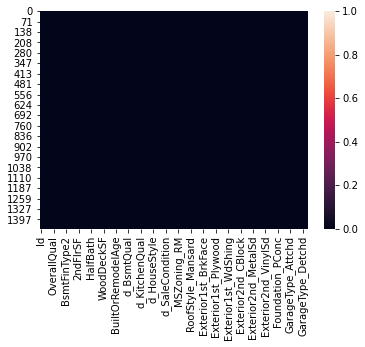

In [98]:
sns.heatmap(df_test.isnull())

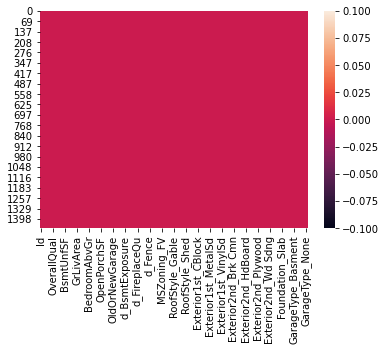

In [99]:
sns.heatmap(df_train.isnull())